In [1]:
import pandas as pd
from datetime import datetime
from plotnine import *
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
cc = pd.read_csv("/Users/melissalamette/Desktop/Master's Program/Winter_Quarter/Cloud_Computing/Assignment_2/combined_data.csv")

In [3]:
cc2 = pd.read_csv("/Users/melissalamette/Desktop/Master's Program/Winter_Quarter/Cloud_Computing/Assignment_2/combined_dataset53.csv")

In [4]:
cc3 = pd.read_csv("/Users/melissalamette/Downloads/combined_data35.csv")

In [5]:
#combine all 3 dataframes together
combined_df = pd.concat([cc, cc2, cc3])

In [6]:
combined_df.head()

,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


## Top Users by Coordinate Count

In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
top_users = combined_df.groupby("user").agg({"coordinate":"count"}).reset_index().sort_values(by="coordinate", ascending = False)
top_10 = top_users.head(10)
top_10

,user,coordinate
1171467,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,147
1264278,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN371LAMW/oqwegoh7Hec1psCxzg39QbtRKnL4M3NA==,126
37938,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw==,98
1386404,tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V9fPY8H5YDHp7HiGFCPp2WkONaXd0ippv87shGmcQ==,95
944216,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ==,86
956138,bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebVE7a+ipl2x8FUkL3oRtUjW+0JImeTYb2XQAEq5rjw==,73
894242,YuV9dD2Bs8I1RVh5dXFoz9DPeY2s5eyKPp8qqR4lcBq8RM/u/DL7Mit+S7O6VX2KLK+DsF5zfYZgvISP/x2Hnw==,70
1070006,gAjvJgodeKO2IW3LVwzZxY4rwMxySmHtCuXAlVGVRD0ZPwNdETJ+S+ut7/1FR0IiF35MmZRGp8PZPgDr6D8pFw==,63
37510,/XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtXRZLw5nwqXSFxU8Ez7u4EM2pc/WCuIQ07Okki1Vew==,60
783557,UJgZrjNi8XJ9UBsHPJTeU9xqeVB59ccxGwfcyx0gANwQWmkLSG9eeYV+UXZWB+tErQ9xQVIQRdrCLstfRrs6tQ==,59


## Top User's Coordinate Distribution

In [9]:
user1 = combined_df[combined_df['user']== "kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g=="]
coo = user1.iloc[:,1:3]
coo

,user,coordinate
331683,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"-340,138"
332610,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"-314,113"
332913,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"-333,124"
333245,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"-341,140"
334579,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"-341,110"
...,...,...
863844,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"296,-676"
865046,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"303,-686"
865491,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"291,-687"
865563,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==,"298,-687"


In [10]:
# top user
user = 'kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g=='  # Change this to the user you are interested in
user_df = coo


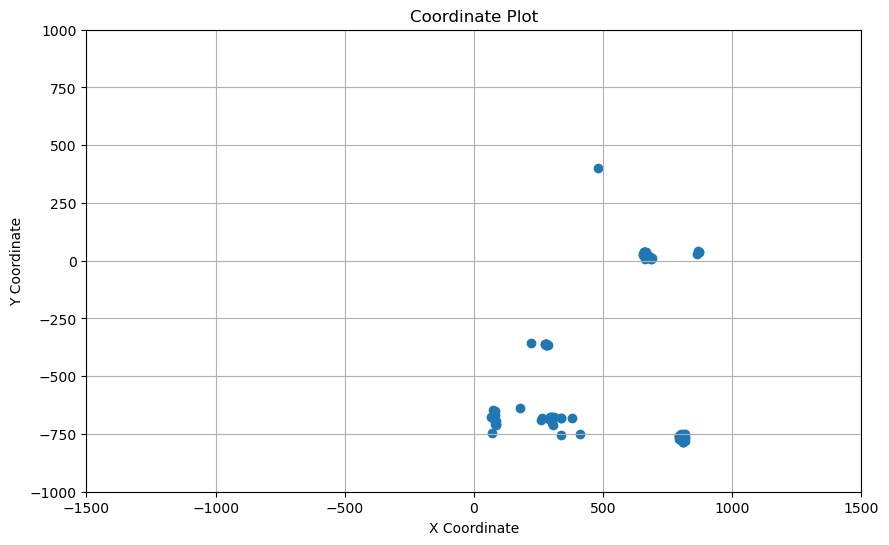

In [11]:
def parse_coordinates(coord_str):
    if re.match(r"^\{X:\s*\d+,\s*Y:\s*-\d+,\s*R:\s*\d+\}$", coord_str):  # Moderation Circles
        coord_parts = re.findall(r"-?\d+", coord_str)
        return [(int(coord_parts[0]), int(coord_parts[1]))]  # Return center of the circle
    elif re.match(r"^\d+,-?\d+,\d+,-?\d+$", coord_str):  # Moderation Rectangles
        x1, y1, x2, y2 = map(int, coord_str.split(','))
        return [(x1, y1), (x2, y2)]  # Return two corners of the rectangle
    elif re.match(r"^\d+,-?\d+$", coord_str):  # Simple Coordinates
        return [tuple(map(int, coord_str.split(',')))]
    else:
        return []  # Unrecognized format

# Normalize coordinates
coordinates = []
for coord in coo['coordinate']:
    coordinates.extend(parse_coordinates(coord))

# Plotting
x, y = zip(*coordinates)  # Splitting the list of tuples into two lists for x and y coordinates

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinate Plot')
plt.grid(True)
plt.xlim(-1500, 1500)
plt.ylim(-1000, 1000)
plt.show()

## Max and Min Coordinates

In [12]:
# Function to parse different coordinate formats
def parse_coordinates(coord_str):
    try:
        if '{' in coord_str and '}' in coord_str:  # Moderation Circles
            coord_parts = re.findall(r"-?\d+", coord_str)
            return [(int(coord_parts[0]), int(coord_parts[1]))]  # Extract X, Y, ignore R
        elif len(coord_str.split(',')) == 4:  # Moderation Rectangles
            x1, y1, x2, y2 = map(int, coord_str.split(','))
            return [(x1, y1), (x2, y2)]  # Extract x1, y1, x2, y2
        elif ',' in coord_str:  # Simple Coordinates
            return [tuple(map(int, coord_str.split(',')))]
    except ValueError:
        return []  # In case of parsing error, return empty list
    return []  # Unrecognized format

# Flatten all coordinates into a list of tuples
all_coordinates = [coord for sublist in combined_df['coordinate'].apply(parse_coordinates) for coord in sublist if len(coord) == 2]

# Find max values for X and Y
max_x = max(coord[0] for coord in all_coordinates)
max_y = max(coord[1] for coord in all_coordinates)

print(f"Maximum X coordinate: {max_x}")
print(f"Maximum Y coordinate: {max_y}")

Maximum X coordinate: 1499
Maximum Y coordinate: 999


## Top 10 User's and Coordinate Map

In [32]:
users = ['kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==',
         'oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN371LAMW/oqwegoh7Hec1psCxzg39QbtRKnL4M3NA==',
"/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw==",
"tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V9fPY8H5YDHp7HiGFCPp2WkONaXd0ippv87shGmcQ==",
"ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ==",
"bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebVE7a+ipl2x8FUkL3oRtUjW+0JImeTYb2XQAEq5rjw==",
"YuV9dD2Bs8I1RVh5dXFoz9DPeY2s5eyKPp8qqR4lcBq8RM/u/DL7Mit+S7O6VX2KLK+DsF5zfYZgvISP/x2Hnw==",
"gAjvJgodeKO2IW3LVwzZxY4rwMxySmHtCuXAlVGVRD0ZPwNdETJ+S+ut7/1FR0IiF35MmZRGp8PZPgDr6D8pFw==",
"/XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtXRZLw5nwqXSFxU8Ez7u4EM2pc/WCuIQ07Okki1Vew==",
"UJgZrjNi8XJ9UBsHPJTeU9xqeVB59ccxGwfcyx0gANwQWmkLSG9eeYV+UXZWB+tErQ9xQVIQRdrCLstfRrs6tQ=="]

In [33]:
filtered_df = combined_df[combined_df['user'].isin(users)]
filtered = filtered_df.iloc[:,1:3]
filtered['user'] = filtered['user'].str.slice(0, 8)

/var/folders/81/px7w5c6n6v5c99j2zb4d2tj80000gn/T/ipykernel_71786/2524708960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


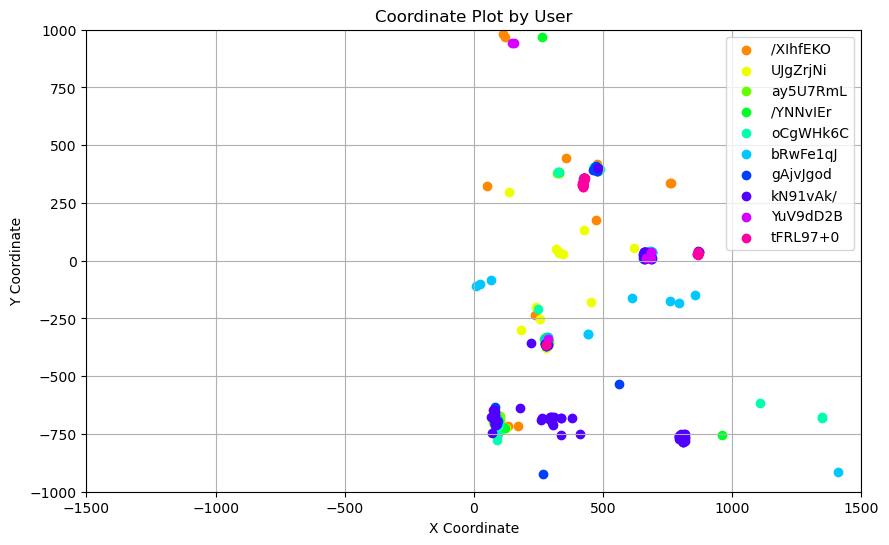

In [34]:
def parse_coordinates(coord_str):
    if re.match(r"^\{X:\s*\d+,\s*Y:\s*-\d+,\s*R:\s*\d+\}$", coord_str):  # Moderation Circles
        coord_parts = re.findall(r"-?\d+", coord_str)
        return [(int(coord_parts[0]), int(coord_parts[1]))]  # Return center of the circle
    elif re.match(r"^\d+,-?\d+,\d+,-?\d+$", coord_str):  # Moderation Rectangles
        x1, y1, x2, y2 = map(int, coord_str.split(','))
        return [(x1, y1), (x2, y2)]  # Return two corners of the rectangle
    elif re.match(r"^\d+,-?\d+$", coord_str):  # Simple Coordinates
        return [tuple(map(int, coord_str.split(',')))]
    else:
        return []  # Unrecognized format

# Get unique users
unique_users = filtered['user'].unique()

# Generate a color palette
colors = sns.color_palette("hsv", len(unique_users))
user_colors = dict(zip(unique_users, colors))

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each user and plot their coordinates
for user, color in user_colors.items():
    user_coordinates = []
    for coord in filtered[filtered['user'] == user]['coordinate']:
        user_coordinates.extend(parse_coordinates(coord))
    
    if user_coordinates:
        x, y = zip(*user_coordinates)
        plt.scatter(x, y, marker='o', color=color, label=user)

# Customizing the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinate Plot by User')
plt.grid(True)
plt.xlim(-1500, 1500)
plt.ylim(-1000, 1000)
plt.legend()  # Show legend
plt.show()


## Top Coordinates used by User

In [84]:
top_coos = combined_df.groupby("coordinate").agg({"user":"count"}).reset_index().sort_values(by="user", ascending = False)
top_coos.head(10)

,coordinate,user
737230,"0,0",1302
180291,"-1500,-1000",854
960532,"20,-401",548
1537340,"999,499",466
265301,"-251,-415",443
265302,"-251,-416",437
921381,"1499,999",424
608878,"-8,12",386
608885,"-8,13",383
451521,"-500,-500",376


## Top Pixels Used

In [85]:
top_cop = combined_df.groupby("pixel_color").agg({"user":"count"}).reset_index().sort_values(by="user", ascending = False)
top_cop.head(10)

,pixel_color,user
0,#000000,581084
31,#FFFFFF,558246
25,#FF4500,364410
29,#FFD635,189197
7,#3690EA,151960
6,#2450A4,111106
3,#00A368,99132
27,#FFA800,99008
26,#FF99AA,58361
21,#D4D7D9,51867


## How Many Unique Pixels Are There?

In [86]:
combined_df["pixel_color"].unique()

array(['#FFFFFF', '#FF4500', '#000000', '#FFD635', '#3690EA', '#00A368',
       '#B44AC0', '#FFA800', '#811E9F', '#9C6926', '#51E9F4', '#D4D7D9',
       '#FF99AA', '#7EED56', '#2450A4', '#898D90', '#BE0039', '#FF3881',
       '#6D482F', '#009EAA', '#00CC78', '#00756F', '#6A5CFF', '#493AC1',
       '#FFF8B8', '#6D001A', '#DE107F', '#FFB470', '#515252', '#94B3FF',
       '#00CCC0', '#E4ABFF'], dtype=object)

## How Many Times Was Each Pixel Color Used?

In [87]:
col_df = combined_df.copy()

In [88]:
col_df["pixel_color"] = col_df["pixel_color"].map(
    {"#FFFFFF":"PureWhite",
        "#FF4500":"OrangeRed",
     "#000000":"black",
     "#FFD635":"BrightYellow",
     "#3690EA":"DodgerBlue",
     "#00A368":"JadeGreen",
     "#B44AC0": "OrchidPurple",
     '#FFA800': 'BrightOrange', 
     '#811E9F':'DarkViolet', 
     '#9C6926':'GoldBrown', 
     '#51E9F4':'SkyBlue',
     '#D4D7D9':'VeryLightGray',
       '#FF99AA':'LightPink',
     '#7EED56':'LawnGreen', 
     '#2450A4':'RoyalBlue', 
     '#898D90':'MediumGray', 
     '#BE0039':'Burgandy', 
     '#FF3881':'HotPink',
       '#6D482F':'DarkBrown',
     '#009EAA':'DarkTurquoise', 
     '#00CC78':'MediumAquamarineGreen',
     '#00756F':'Teal', 
     "#00756F": "DeepTealTealWebColor",
    "#6A5CFF": "SoftBlueSlateBlue",
    "#493AC1": "DeepBlueBlueRYB",
    "#FFF8B8": "PaleYellowLightYellow",
    "#6D001A": "VeryDarkMaroon",
    "#DE107F": "BrightMagentaFuchsia",
    "#FFB470": "LightOrangePeach", '#515252':'DarkGray', '#94B3FF':'LightBlue(Periwinkle)',
       '#00CCC0':'MediumTurquoise', '#E4ABFF':'Lavendar'})

In [89]:
colors = col_df.groupby("pixel_color").agg({"user":"count"}).reset_index().sort_values(by = "user", ascending = False)
colors.head(10).reset_index()

,pixel_color,user
31,black,581084
25,PureWhite,558246
22,OrangeRed,364410
2,BrightYellow,189197
10,DodgerBlue,151960
26,RoyalBlue,111106
13,JadeGreen,99132
1,BrightOrange,99008
18,LightPink,58361
30,VeryLightGray,51867


## What Was The Average Time Of Day For Each Pixel Color?

In [90]:
col_df.head()

,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",PureWhite
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",OrangeRed
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",black
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",black
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",black


In [91]:
 col_df["timestamp"] = pd.to_datetime(col_df["timestamp"], errors='coerce')

In [92]:
col_df['date'] = col_df['timestamp'].dt.date
col_df['time'] = col_df['timestamp'].dt.time

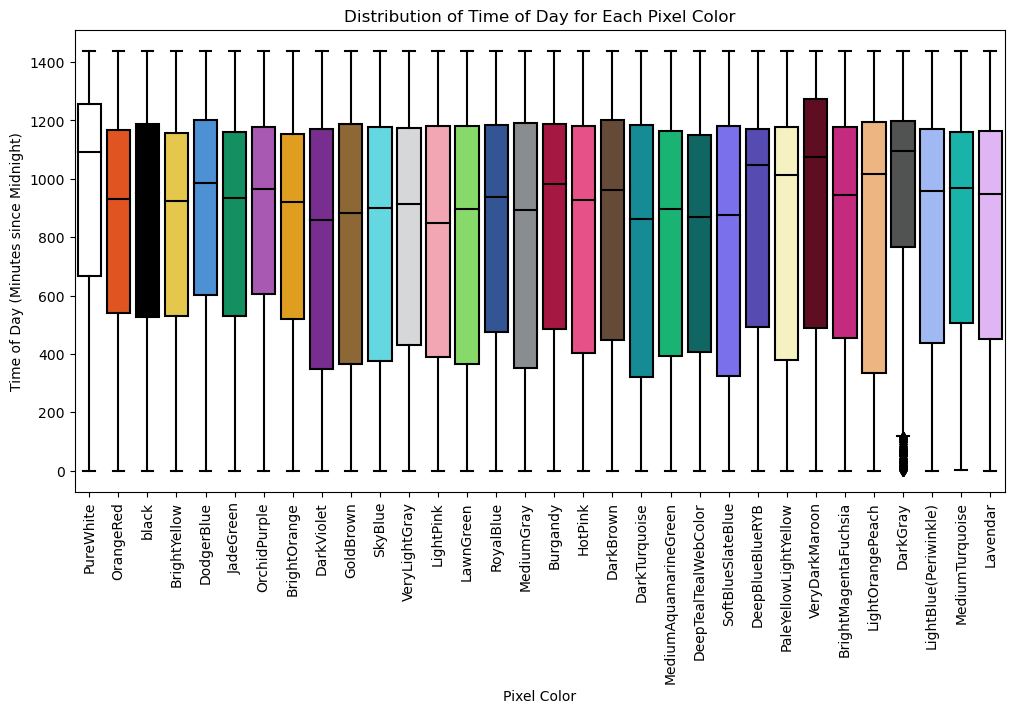

In [104]:
col_df['timestamp'] = pd.to_datetime(col_df['timestamp'])

# Extract time and convert to minutes since midnight
col_df['time_in_minutes'] = col_df['timestamp'].dt.hour * 60 + col_df['timestamp'].dt.minute

palette = {
    "PureWhite": "#FFFFFF",
    "OrangeRed": "#FF4500",
    "black": "#000000",
    "BrightYellow": "#FFD635",
    "DodgerBlue": "#3690EA",
    "JadeGreen": "#00A368",
    "OrchidPurple": "#B44AC0",
    "BrightOrange": '#FFA800', 
    "DarkViolet": '#811E9F', 
    "GoldBrown": '#9C6926', 
    "SkyBlue": '#51E9F4',
    "VeryLightGray": '#D4D7D9',
    "LightPink": '#FF99AA',
    "LawnGreen": '#7EED56', 
    "RoyalBlue": '#2450A4', 
    "MediumGray": '#898D90', 
    "Burgandy": '#BE0039', 
    "HotPink": '#FF3881',
    "DarkBrown": '#6D482F',
    "DarkTurquoise": '#009EAA', 
    "MediumAquamarineGreen": '#00CC78',
    "Teal": '#00756F', 
    "DeepTealTealWebColor": "#00756F",
    "SoftBlueSlateBlue": "#6A5CFF",
    "DeepBlueBlueRYB": "#493AC1",
    "PaleYellowLightYellow": "#FFF8B8",
    "VeryDarkMaroon": "#6D001A",
    "BrightMagentaFuchsia": "#DE107F",
    "LightOrangePeach": "#FFB470",
    "DarkGray": '#515252',
    "LightBlue(Periwinkle)": '#94B3FF',
    "MediumTurquoise": '#00CCC0',
    "Lavendar": '#E4ABFF'
}



# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='pixel_color', y='time_in_minutes', data=col_df, palette=palette)

# Rotate x labels for better readability if there are many colors
plt.xticks(rotation=90)
plt.title('Distribution of Time of Day for Each Pixel Color')
plt.xlabel('Pixel Color')
plt.ylabel('Time of Day (Minutes since Midnight)')

plt.show()

# 400 is like 6:40 am
# 800 is like 1:00 pm
# 1400 is like 11:00 pm

## Pixel Color By User Count

In [108]:
color_user_count = col_df.groupby('pixel_color')['user'].nunique()

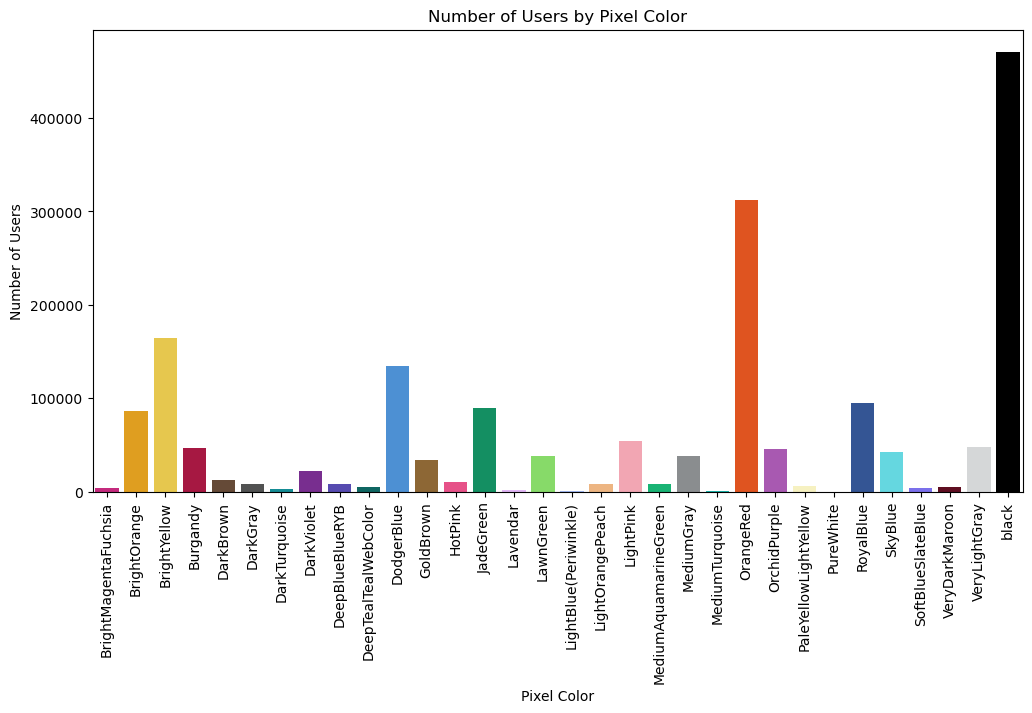

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(x=color_user_count.index, y=color_user_count.values, palette=palette)

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Pixel Color')
plt.ylabel('Number of Users')
plt.title('Number of Users by Pixel Color')

# Show the plot
plt.show()

In [120]:
# Plot
plot = (
    ggplot(top_cop, aes(x='pixel_color', y='user'))
    + geom_bar(stat='identity', fill=palette)  # 'identity' tells geom_bar to use the y values as heights of the bars
    + theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x-axis labels for better readability
    + labs(x='Pixel Color', y='Number of Users', title='Number of Users by Pixel Color')
)

print(plot)

AttributeError: 'float' object has no attribute 'lower'